In [3]:
    # run this cell to setup matplotlib, and also import the very important take_picture function from camera!
    %matplotlib notebook
    import matplotlib.pyplot as plt
    from camera import take_picture
    import numpy as np

In [4]:
    # run this cell to download the models from dlib
    from dlib_models import download_model, download_predictor, load_dlib_models
    download_model()
    download_predictor()
    from dlib_models import models

File already exists:
	c:\users\lilian\bwsi-dlib-models\dlib_models\dlib_face_recognition_resnet_model_v1.dat
File already exists:
	c:\users\lilian\bwsi-dlib-models\dlib_models\shape_predictor_68_face_landmarks.dat


In [7]:
#import statements from other methods

[rectangle(344,244,493,394), rectangle(-32,272,107,397)]


<IPython.core.display.Javascript object>


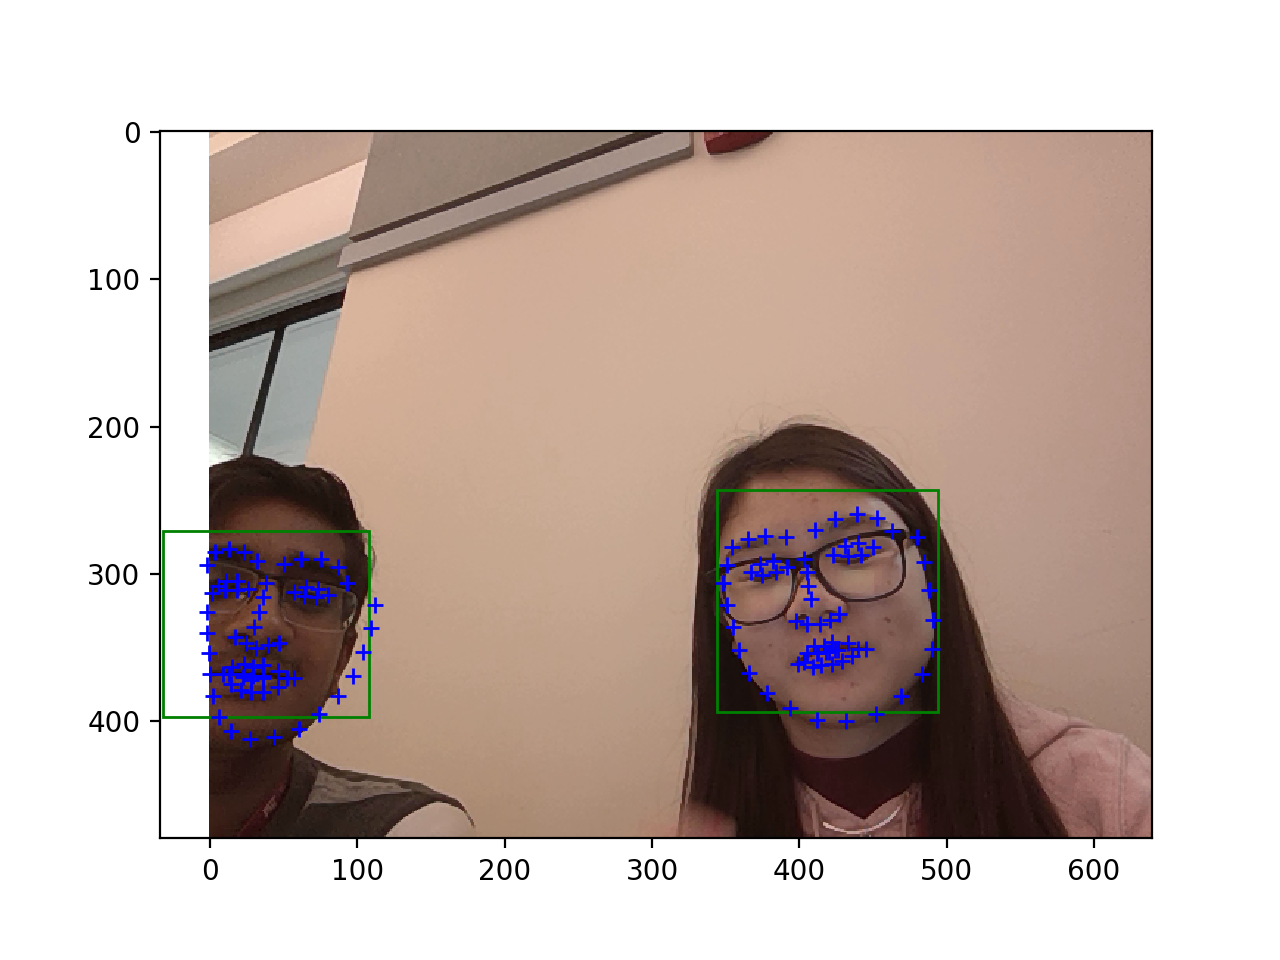

Number of faces detected: 2
[ 0.02009195  0.10165028  0.03046734 -0.03000576 -0.12173999 -0.01727152
 -0.02047431 -0.08125759  0.13397427 -0.15610288  0.19342701 -0.03739639
 -0.21951899 -0.05760676  0.03640884  0.10782596 -0.05284213 -0.08128709
 -0.06910115 -0.06808854  0.09642407  0.08936021  0.04156634  0.05667692
 -0.08305164 -0.38480476 -0.07400575 -0.07419644 -0.03934265 -0.08733885
 -0.02973316  0.08546791 -0.13747235 -0.06258106  0.0145961   0.06986246
 -0.0692642  -0.07753207  0.22251086  0.01267536 -0.18094169 -0.06198145
  0.05017442  0.2667802   0.09439138 -0.02474288  0.03397885 -0.10019361
  0.09451612 -0.170497    0.01164609  0.15432698 -0.00373539  0.06840103
  0.06572871 -0.05766379  0.08369351  0.12189113 -0.16036056 -0.00483947
  0.05794382 -0.13168706 -0.09254505 -0.08004482  0.26160625  0.0676358
 -0.04810904 -0.14908378  0.05371706 -0.15746774 -0.15541628  0.04161144
 -0.16655605 -0.15290749 -0.27789056  0.00259727  0.33974496  0.13795903
 -0.19006084  0.07796003

In [20]:
#take the picture
pic = take_picture()

# first, we load the models that dlib has to detect faces.
load_dlib_models()
face_detect = models["face detect"]
face_rec_model = models["face rec"]
shape_predictor = models["shape predict"]

# detects the face through corners
detections = list(face_detect(pic))
print(detections) # list of shape n for n faces

from matplotlib.patches import Rectangle
fig,ax = plt.subplots()
ax.imshow(pic)


print("Number of faces detected: {}".format(len(detections)))
for k, d in enumerate(detections):
    # Get the landmarks/parts for the face in box d.
    shape = shape_predictor(pic, d)
    # Draw the face landmarks on the screen.
    for i in range(68):
        ax.plot(shape.part(i).x,shape.part(i).y,'+',color="blue")

import matplotlib.patches as patches
for faces in detections:
    # Create a Rectangle patch
    rect = patches.Rectangle((faces.left(),faces.bottom()),faces.width(),-faces.height(),linewidth=1,edgecolor='g',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.show()

for face in detections:
    # let's take a look as to what the descriptor is!!
    shape = shape_predictor(pic, face)
    descriptor = np.array(face_rec_model.compute_face_descriptor(pic, shape))
    print(descriptor) # descriptor vector
    print(descriptor.shape)
    
    #compares descriptor to database through img_in_databse
    
    #